In [1]:
# import dependencies
from api_keys import alpha_vantage_api_key
import pprint as pp
import pandas as pd
from datetime import datetime
import requests
import matplotlib.pyplot as plt

## Get API data and put it in json

In [2]:
# declare codes of tickers used for the manufacturers
codes = ["AAPL", "MSI", "GOOG", "GOOGL"]
manufacturers = ["apple", "motorola", "google_class_c", "google_class_a"]


# declare dates and net incomes
dates = []
net_incomes = []

# create dataframe dictionary
dfs = {}

# initialize counter
counter = 0

# main for loop that loops through the ticker codes
for code in codes:
    # get jsons
    url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={code}&outputsize=full&apikey={alpha_vantage_api_key}'
    response = requests.get(url)
    data_json = response.json()
    
    try:
        for quarter in data_json["quarterlyReports"]:
            net_incomes.append(float(quarter["netIncome"]))
            current_date_str = quarter["fiscalDateEnding"]
            current_date = datetime.strptime(current_date_str,'%Y-%m-%d')
            dates.append(current_date_str)
    except:
        pass
    
    # make a data dictionary from the data
    data_dict = {
        "Date" : dates,
        "Net Income" : net_incomes
    }
    
    # make a dataframe out of the dicitonary
    data_df = pd.DataFrame(data_dict)
    
    # assign each dataframe as a value in a dataframe dictionary
    dfs[f"{manufacturers[counter]}_df"] = data_df
    
    # clear all the lists so that they can be used in the next iteration of loop
    dates.clear()
    net_incomes.clear()
    
    # increment counter
    counter = counter + 1
    
    

In [3]:
apple_df = dfs["apple_df"]
apple_df.to_csv("resources/apple_net_income.csv")
apple_df

,Date,Net Income
0,2023-03-31,2.416000e+10
1,2022-12-31,2.999800e+10
2,2022-09-30,2.072100e+10
3,2022-06-30,1.944200e+10
4,2022-03-31,2.501000e+10
5,2021-12-31,3.463000e+10
6,2021-09-30,2.055100e+10
7,2021-06-30,2.174400e+10
8,2021-03-31,2.363000e+10
9,2020-12-31,2.875500e+10


In [4]:
motorola_df = dfs["motorola_df"]
motorola_df.to_csv('resources/motorola_net_income.csv')
motorola_df

,Date,Net Income
0,2023-03-31,278000000.0
1,2022-12-31,589000000.0
2,2022-09-30,279000000.0
3,2022-06-30,228000000.0
4,2022-03-31,267000000.0
5,2021-12-31,401000000.0
6,2021-09-30,307000000.0
7,2021-06-30,293000000.0
8,2021-03-31,244000000.0
9,2020-12-31,412000000.0


In [5]:
google_class_c_df = dfs["google_class_c_df"]
google_class_c_df.to_csv("resources/google_class_c_net_income.csv")
google_class_c_df

,Date,Net Income
0,2023-03-31,1.505100e+10
1,2022-12-31,1.362400e+10
2,2022-09-30,1.391000e+10
3,2022-06-30,1.600200e+10
4,2022-03-31,1.643600e+10
5,2021-12-31,2.064200e+10
6,2021-09-30,1.893600e+10
7,2021-06-30,1.852500e+10
8,2021-03-31,1.793000e+10
9,2020-12-31,1.522700e+10


In [6]:
google_class_a_df = dfs["google_class_a_df"]
google_class_a_df.to_csv("resources/google_class_a_net_income.csv")
google_class_a_df

,Date,Net Income
0,2023-03-31,1.505100e+10
1,2022-12-31,1.362400e+10
2,2022-09-30,1.391000e+10
3,2022-06-30,1.600200e+10
4,2022-03-31,1.643600e+10
5,2021-12-31,2.064200e+10
6,2021-09-30,1.893600e+10
7,2021-06-30,1.852500e+10
8,2021-03-31,1.793000e+10
9,2020-12-31,1.522700e+10


<Axes: xlabel='Date'>

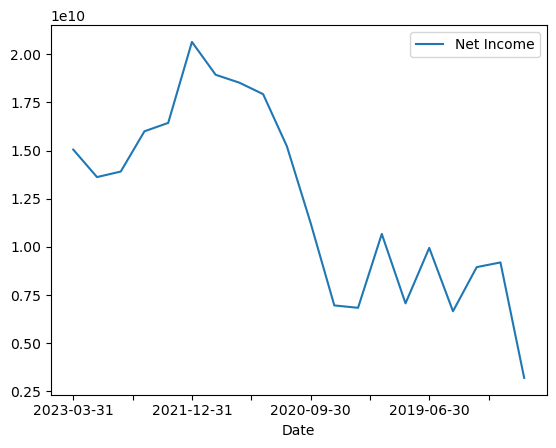

In [7]:
google_class_a_df.plot("Date", "Net Income")